In [13]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from FileManager import FileManager 

In [14]:
fileManager = FileManager()

In [15]:
df = pd.read_csv(fileManager._get_path_global_csv_file()).set_index("id_micro")
#column_X = ["f_2", "f_3", "M1,1"]#, "M1,2", "M1,3", "M1,4", "M1,5", "M1,6", "M2,2", "M2,3", "M2,4", "M2,5", "M2,6", "M3,3", "M3,4", "M3,5", "M3,6", "M4,4", "M4,5", "M4,6", "M5,5", "M5,6", "M6,6"]
#column_X = ["M1,1"]# around 0.6
#column_X = ["f_2", "f_3"]
#column_X = ["f_2", "f_3", "M1,1"] around 0.7
#column_X = ["f_2", "f_3", "M1,1", "M2,2", "M3,3", "M4,4", "M5,5", "M6,6"] above 0.7
column_X = ["M1,1", "M1,2", "M1,3", "M1,4", "M1,5", "M1,6", "M2,2", "M2,3", "M2,4", "M2,5", "M2,6", "M3,3", "M3,4", "M3,5", "M3,6", "M4,4", "M4,5", "M4,6", "M5,5", "M5,6", "M6,6", "f_2", "f_3"] # above 0.8
column_Y = ["last_sigma"]
X = df[column_X]
y = df[column_Y]

In [16]:
train, test = train_test_split(df, test_size=0.2)
X_train, X_test = train[column_X], test[column_X]
y_train, y_test = train[column_Y], test[column_Y]
std_scaler2 = StandardScaler()
y_train_scaled = std_scaler2.fit_transform(y_train)
y_test_scaled = std_scaler2.transform(y_test)

In [17]:
mlp_regressor = MLPRegressor()
mlp_pipe = make_pipeline(StandardScaler(), mlp_regressor)
#H_grid = list(zip(*[np.arange(1, 6, step=1)]*3))
H_grid = [(i,j,k) for i in range(1,8) for j in range(1,8) for k in range(1,8)] + [(i,j) for i in range(1,8) for j in range(1,8)]
param_grid = {"mlpregressor__hidden_layer_sizes":H_grid,
              "mlpregressor__activation":["identity", "relu", "logistic", "tanh"],
              "mlpregressor__solver": ["lbfgs", "sgd", "adam"]}
grid_search = GridSearchCV(mlp_pipe, param_grid=param_grid, n_jobs=16)

In [18]:
grid_search.fit(X_train, y_train_scaled.ravel())

/home/vludvig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vludvig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vludvig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpregressor', MLPRegressor())]),
             n_jobs=16,
             param_grid={'mlpregressor__activation': ['identity', 'relu',
                                                      'logistic', 'tanh'],
                         'mlpregressor__hidden_layer_sizes': [(1, 1, 1),
                                                              (1, 1, 2),
                                                              (1, 1, 3),
                                                              (1, 1, 4),
                                                              (1, 1, 5),
                                                              (1, 1, 6),
                                                              (1, 1, 7),
                                                              (1, 2, 1),
                                                              (1, 2, 2),
                                                              (1, 2, 3),
                                                              (1, 2, 4),
                                                              (1, 2, 5),
                                                              (1, 2, 6),
                                                              (1, 2, 7),
                                                              (1, 3, 1),
                                                              (1, 3, 2),
                                                              (1, 3, 3),
                                                              (1, 3, 4),
                                                              (1, 3, 5),
                                                              (1, 3, 6),
                                                              (1, 3, 7),
                                                              (1, 4, 1),
                                                              (1, 4, 2),
                                                              (1, 4, 3),
                                                              (1, 4, 4),
                                                              (1, 4, 5),
                                                              (1, 4, 6),
                                                              (1, 4, 7),
                                                              (1, 5, 1),
                                                              (1, 5, 2), ...],
                         'mlpregressor__solver': ['lbfgs', 'sgd', 'adam']})

In [19]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print("Best training score : {}".format(grid_search.best_score_))
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, grid_search.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'mlpregressor__activation': 'identity', 'mlpregressor__hidden_layer_sizes': (1, 5, 6), 'mlpregressor__solver': 'lbfgs'}
Best training score : 0.7982102056565387

Grid scores on development set:

0.771 (+/-0.257) for {'mlpregressor__activation': 'identity', 'mlpregressor__hidden_layer_sizes': (1, 1, 1), 'mlpregressor__solver': 'lbfgs'}
0.281 (+/-0.471) for {'mlpregressor__activation': 'identity', 'mlpregressor__hidden_layer_sizes': (1, 1, 1), 'mlpregressor__solver': 'sgd'}
-0.928 (+/-2.437) for {'mlpregressor__activation': 'identity', 'mlpregressor__hidden_layer_sizes': (1, 1, 1), 'mlpregressor__solver': 'adam'}
0.762 (+/-0.277) for {'mlpregressor__activation': 'identity', 'mlpregressor__hidden_layer_sizes': (1, 1, 2), 'mlpregressor__solver': 'lbfgs'}
0.234 (+/-0.567) for {'mlpregressor__activation': 'identity', 'mlpregressor__hidden_layer_sizes': (1, 1, 2), 'mlpregressor__solver': 'sgd'}
-0.509 (+/-3.938) for {'mlpregressor__activation': 

In [20]:
hls = grid_search.best_params_["mlpregressor__hidden_layer_sizes"]
activation_gs = grid_search.best_params_["mlpregressor__activation"]
solver_gs = grid_search.best_params_["mlpregressor__solver"]
MLP = make_pipeline(StandardScaler(), MLPRegressor(solver=solver_gs, hidden_layer_sizes=hls, activation=activation_gs))
MLP.fit(X_train, y_train_scaled.ravel())

/home/vludvig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='identity',
                              hidden_layer_sizes=(1, 5, 6), solver='lbfgs'))])

Text(0.5, 1.0, 'Importance of features on the training set')

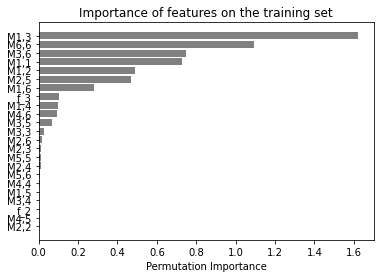

In [21]:
r_train = permutation_importance(MLP, X_train, y_train_scaled, n_repeats=100)
features = np.array(column_X)
sorted_idx_train = r_train.importances_mean.argsort()
plt.barh(features[sorted_idx_train], r_train.importances_mean[sorted_idx_train], color="gray")
plt.xlabel("Permutation Importance")
plt.title("Importance of features on the training set")

In [22]:
MLP.score(X_train, y_train_scaled)

0.8463081320779362

In [23]:
MLP.score(X_test, y_test_scaled)

0.7856359886238868

Text(0.5, 1.0, 'Elasticity matrix MLP')

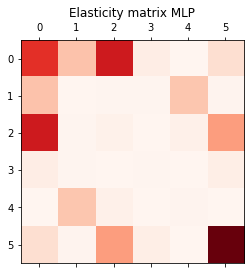

In [31]:
matrix = np.zeros((6,6))
for m in range (len(column_X)-2):
    i = int(column_X[m][1])
    j = int(column_X[m][3])
    matrix[i-1,j-1] = abs(r_train.importances_mean[m])
matrix += np.transpose(matrix)
plt.matshow(matrix, cmap=plt.cm.Reds)
plt.title("Elasticity matrix MLP")

matrix = np.zeros((6,6))
for m in range (len(column_X)-2):
    i = int(column_X[m][1])
    j = int(column_X[m][3])
    matrix[i-1,j-1] = abs(r_train.importances_mean[m])
matrix += np.transpose(matrix)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, cmap=plt.cm.Reds)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(np.arange(1,7))
ax.set_yticks(np.arange(6))
ax.set_yticklabels(np.arange(1,7))
ax.tick_params(axis="both", labelsize=15)
fig.savefig("/home/vludvig/nas/stage/python/clustering_v1/experiments/experiment2/images/MLP_matrix.png")
#plt.title("Elasticity matrix linear regression")